# Planteamiento del caso

Imagina que trabajamos en una empresa que proporciona algún tipo de suministro básico a los hogares. Cuando se detecta un cliente insatisfecho, como puede estar en riesgo de fuga, se le pasa a una unidad especial de Atención al Cliente, la Unidad de Recuperación. En función de una serie de variables socio-economico-cultural y del historico del cliente se decide si aplicarle una estrategia de recuperación o no. En algunos casos la intervención tiene exito y en otras no.

Nuestro objetivo es diseñar y crear un mock dataset replicando esta situación, al que luego aplicaremos diferentes estrategias para medir el efecto causal de la intervención. Estimaremos ATE, ATT y ATU usando métodos como IPW, matching y propensity scores con estratificación.

Empecemos identificando la forma que debe tener nuestro mock dataset. Qué variables crees que podemos simular para componer este mock dataset?

## Diseño del *mock dataset*

Para simular un escenario realista en el que podamos estudiar el efecto causal de la “intervención” (Unidad de Recuperación) sobre la retención o fuga de clientes, necesitamos un conjunto de variables que reflejen tanto las características de los clientes como su contexto socioeconómico, su historial de relación con la empresa y la intervención misma.

A continuación se describe un ejemplo de cómo podría lucir la estructura del dataset y qué variables (columnas) podrían considerarse. Obviamente, se pueden añadir o quitar campos según la complejidad que deseemos.

1. Identificación del cliente

+ **customer_id**: Identificador único de cada cliente.

2. Variables sociodemográficas

+ **age**: Edad del cliente.
+ **gender**: Género (por ejemplo, codificado como M/F o similar).
+ **income_bracket**: Rango de ingresos (categorías como “bajo”, “medio”, “alto”).
+ **education_level**: Nivel educativo (por ejemplo, “Secundaria”, “Universitaria”, “Posgrado”).
+ **marital_status**: Estado civil (soltero, casado, etc.).
+ **household_size**: Número de personas en el hogar.


Estas variables influyen en la capacidad de pago, en la propensión a cambiar de proveedor, etc.

3. Variables geográficas y de contexto

+ **region**: Área geográfica o región (urbana, rural o incluso códigos de región más específicos).
+ **competitor_presence**: Podríamos crear un indicador o índice de cuánta competencia hay en esa región (un valor numérico o categórico que indique “Alta”, “Media”, “Baja”).

4. Variables relacionadas con la relación con la empresa

+ **tenure**: Antigüedad con la empresa (en meses o años).
+ **contract_type**: Tipo de contrato (por ejemplo, plan básico, plan premium, prepago/pospago, etc.).
+ **payment_method**: Método de pago (tarjeta, domiciliación bancaria, efectivo, etc.).
+ **payment_history**: Un indicador del historial de pagos (por ejemplo, número de retrasos en el último año, o proporción de pagos puntuales).
+ **monthly_consumption**: Consumo medio mensual del servicio (puede ser kWh en caso de luz, m³ en caso de agua o gas, etc.).
+ **customer_satisfaction_score**: Puntuación de satisfacción previa a la intervención (por ejemplo, de 1 a 10).
+ **complaints_last_year**: Número de quejas o incidencias registradas en el último año.

Estas variables ayudan a identificar a los clientes con mayor riesgo de fuga y a explicar cómo se decide la intervención.

5. Variables que determinan la insatisfacción/riesgo de fuga

+ **churn_risk_score**: Un “score” calculado internamente por la empresa para estimar la probabilidad de que el cliente abandone.
+ **flag_unsatisfied**: Variable booleana (0/1) que indica si el cliente ha manifestado claramente su insatisfacción o si la empresa lo ha marcado como en riesgo de fuga.

La empresa, basándose en estas y otras variables, decide si aplica la estrategia de recuperación.

6. Variable de tratamiento o intervención

+ **treatment**: Variable booleana (0/1) que indique si el cliente fue derivado a la Unidad de Recuperación y recibió la intervención.
+ **Importante** reflejar que la asignación no es aleatoria, sino que depende de los factores anteriores (edad, ingreso, riesgo de fuga, etc.).

7. Variables de resultado o “outcomes”

+ **churned**: Variable booleana (0/1) que indique si el cliente ha abandonado la empresa en el periodo de observación posterior.
+ (Opcional) **retention_time**: Tiempo (en meses) que el cliente se mantuvo tras la intervención (si queremos mayor granularidad).
+ (Opcional) **post_intervention_satisfaction**: Un nuevo score de satisfacción, medido tras un periodo de la intervención.

El outcome principal suele ser “churned” o “no churned”, pero podemos añadir otras medidas según el interés del análisis.

### Resumen de un posible diccionario de datos

+ **customer_id** (ID único, tipo: numérico o string)
+ **age** (tipo: numérico, rango 18–80 p.ej.)
+ **gender** (categoría: “M”, “F”, “Otro”)
+ **income_bracket** (categoría: “bajo”, “medio”, “alto”)
+ **education_level** (categoría: “Secundaria”, “Universitaria”, etc.)
+ **marital_status** (categoría: “Soltero”, “Casado”, etc.)
+ **household_size** (numérico, ej. 1–5)
+ **region** (categoría, ej. “Norte”, “Sur”, “Centro” o “Urbano/Rural”)
+ **competitor_presence** (numérico o categórico, ej. “Alta”, “Media”, “Baja”)
+ **tenure** (numérico, años o meses)
+ **contract_type** (categoría, p. ej. “Básico”, “Premium”, “Prepago”, etc.)
+ **payment_method** (categoría, p. ej. “Tarjeta”, “Domiciliación”, “Efectivo”)
+ **payment_history** (numérico, p.ej. número de retrasos o indicador de fiabilidad de pagos)
+ **monthly_consumption** (numérico, p.ej. kWh, m³, etc.)
+ **customer_satisfaction_score** (numérico, 1–10)
+ **complaints_last_year** (numérico, cuenta de incidencias)
+ **churn_risk_score** (numérico, 0–1 o 0–100)
+ **flag_unsatisfied** (booleano, 0/1)
+ **treatment** (booleano, 0/1)
+ **churned** (booleano, 0/1)
+ **post_intervention_satisfaction** (opcional, numérico, 1–10)
+ **retention_time** (opcional, numérico, meses)

## Cómo encaja esto con la estimación del efecto causal

1. **Tratamiento** (treatment) es la variable de interés (si se aplica la estrategia de recuperación o no).
2. **Outcome** (churned) es el resultado principal que queremos explicar.
3. **Covariables** (age, income_bracket, churn_risk_score, etc.) se utilizan para:
    + Explicar la probabilidad de ser tratado (propensity score).
    + Ajustar el modelo para aislar el efecto del tratamiento.
4. Con este dataset, podemos aplicar metodologías como:
    + **IPW** (Inverse Probability Weighting), utilizando un modelo de propensity score que calcule la probabilidad de recibir la intervención según las covariables.
    + **Matching** (Parear clientes tratados y no tratados con perfiles similares).
    + **Estratificación** por niveles de propensity score.
    + **Posteriormente**, estimar ATE, ATT y ATU.

In [1]:
import numpy as np
import pandas as pd

# Fijamos semilla para reproducibilidad
np.random.seed(42)

# 1. Tamaño de la muestra
N = 10_000

# =============================================================================
# 2. Variables básicas (demográficas y socioeconómicas)
# =============================================================================

# Edad (distribución normal truncada en [18, 80])
ages = np.random.normal(40, 12, size=N)
ages = np.clip(ages, 18, 80)  # truncamos a mínimo 18 y máximo 80

# Género (distribución categórica)
genders = np.random.choice(["M", "F", "Otro"], size=N, p=[0.48, 0.48, 0.04])

# Income bracket (bajo, medio, alto)
income_brackets = np.random.choice(["bajo", "medio", "alto"],
                                   size=N,
                                   p=[0.3, 0.5, 0.2])

# Región (urbano, rural)
regions = np.random.choice(["urbano", "rural"], size=N, p=[0.7, 0.3])

# Tamaño del hogar (1 a 5)
household_sizes = np.random.choice([1, 2, 3, 4, 5],
                                   size=N,
                                   p=[0.2, 0.3, 0.3, 0.15, 0.05])

# =============================================================================
# 3. Variables de relación con la empresa (con algo de correlación)
# =============================================================================

# Tenure (años con la compañía), correlacionado positivamente con la edad
tenure_noise = np.random.normal(0, 3, size=N)
tenure = 5 + 0.2*(ages - 40) + tenure_noise  # base lineal
tenure = np.clip(tenure, 0, 25)  # mínimo 0, máximo 25 años

# Payment_history (número de retrasos, 0 a 5 aprox.)
# mayor probabilidad de retraso si ingresos "bajo" o edad < 25
base_ph = ((income_brackets == "bajo").astype(int) +
           (ages < 25).astype(int))  # puede valer 0, 1 o 2
payment_history = np.random.poisson(lam=1 + base_ph, size=N)
payment_history = np.clip(payment_history, 0, 5)

# Monthly_consumption, mayor si ingresos altos y más personas en el hogar
income_factor = np.where(income_brackets == "alto", 1.2,
                 np.where(income_brackets == "medio", 1.0, 0.8))
monthly_consumption = 50*income_factor + 5*household_sizes
monthly_consumption += np.random.normal(0, 10, size=N)  # ruido
monthly_consumption = np.clip(monthly_consumption, 10, 300)

# Customer_satisfaction_score (1 a 10)
# sube con ingresos y baja con más retrasos
sat_base = 6 + (income_factor - 1.0)*1.5 - payment_history*0.5
customer_satisfaction_score = sat_base + np.random.normal(0, 1.5, size=N)
customer_satisfaction_score = np.clip(customer_satisfaction_score, 1, 10)

# Complaints_last_year (0, 1, 2, ...), mayor si satisfacción es baja y hay retrasos
complaints_lambda = 1.5 + 0.4*payment_history - 0.3*(customer_satisfaction_score - 5)
complaints_lambda = np.clip(complaints_lambda, 0.1, 5)
complaints_last_year = np.random.poisson(complaints_lambda, size=N)

# =============================================================================
# 4. Calcular churn_risk_score y flag_unsatisfied
# =============================================================================

# Modelo lineal que combine satisfaction, quejas, retrasos y tenure
risk_linear = (
    -0.3*customer_satisfaction_score +
    0.2*complaints_last_year +
    0.15*payment_history +
    -0.08*tenure +
    np.random.normal(0, 0.7, size=N)
)

def logistic(x):
    return 1 / (1 + np.exp(-x))

churn_risk_score = logistic(risk_linear)

# Flag de insatisfacción 
flag_unsatisfied_prob = 0.5 + 0.4*(churn_risk_score - 0.5)
flag_unsatisfied_prob = np.clip(flag_unsatisfied_prob, 0, 1)
flag_unsatisfied = (np.random.rand(N) < flag_unsatisfied_prob).astype(int)

# =============================================================================
# 5. Asignación al tratamiento (treatment) de forma no aleatoria
# =============================================================================

# Probabilidad de tratamiento que depende de churn_risk_score e income_bracket

p_treatment = 0.2 + 0.3*churn_risk_score   # base
p_treatment[flag_unsatisfied == 1] += 0.15 # sube si insatisfecho
p_treatment = np.clip(p_treatment, 0, 0.85)

treatment = (np.random.rand(N) < p_treatment).astype(int)

# =============================================================================
# 6. Outcome: churned
# =============================================================================

effect = np.where(churn_risk_score < 0.5, 0.3, 0.2)
churn_prob = churn_risk_score.copy()
churn_prob[treatment==1] *= (1 - effect[treatment==1])

churned = (np.random.rand(N) < churn_prob).astype(int)

# =============================================================================
# 7. (Opcional) post_intervention_satisfaction
# =============================================================================
post_sat = customer_satisfaction_score + treatment - 0.5*churned
post_sat += np.random.normal(0, 0.5, size=N)
post_sat = np.clip(post_sat, 1, 10)

# =============================================================================
# 8. Construcción del DataFrame final
# =============================================================================
df = pd.DataFrame({
    "customer_id": range(N),
    "age": ages,
    "gender": genders,
    "income_bracket": income_brackets,
    "region": regions,
    "household_size": household_sizes,
    "tenure": tenure,
    "payment_history": payment_history,
    "monthly_consumption": monthly_consumption,
    "customer_satisfaction_score": customer_satisfaction_score,
    "complaints_last_year": complaints_last_year,
    "churn_risk_score": churn_risk_score,
    "flag_unsatisfied": flag_unsatisfied,
    "treatment": treatment,
    "effect": effect,
    "churn_prob": churn_prob,
    "churned": churned,
    "post_intervention_satisfaction": post_sat
})

# Muestra un vistazo a los datos
print(df.head(10))
print(df.describe(include='all'))


   customer_id        age gender income_bracket  region  household_size  \
0            0  45.960570      M           bajo  urbano               2   
1            1  38.340828      M          medio  urbano               3   
2            2  47.772262      M           alto  urbano               2   
3            3  58.276358      M          medio  urbano               1   
4            4  37.190160      F           bajo  urbano               2   
5            5  37.190357      M          medio  urbano               3   
6            6  58.950554      M          medio  urbano               2   
7            7  49.209217      F          medio   rural               3   
8            8  34.366307      M          medio  urbano               2   
9            9  46.510721      F           bajo  urbano               2   

      tenure  payment_history  monthly_consumption  \
0   8.005516                1            48.858802   
1   6.450702                0            56.754625   
2   7.502395

In [2]:
df.to_csv("../DATA/churn_mock_data.csv", index=False)

## Validar el resultado

+ Revisar estadísticas descriptivas (media, desviación, histogramas) para ver si los datos lucen razonables.
+ Verificar que haya proporciones suficientes de tratados/no tratados y churn en distintos niveles de churn_risk_score.
+ Ajustar parámetros (coeficientes en los modelos lineales, lambdas en Poisson, etc.) hasta obtener distribuciones que reflejen un escenario plausible.

In [3]:
df

,customer_id,age,gender,income_bracket,region,household_size,tenure,payment_history,monthly_consumption,customer_satisfaction_score,complaints_last_year,churn_risk_score,flag_unsatisfied,treatment,effect,churn_prob,churned,post_intervention_satisfaction
0,0,45.960570,M,bajo,urbano,2,8.005516,1,48.858802,5.221074,4,0.109862,1,0,0.3,0.109862,0,5.443736
1,1,38.340828,M,medio,urbano,3,6.450702,0,56.754625,6.088374,0,0.158069,0,1,0.3,0.110648,0,6.773708
2,2,47.772262,M,alto,urbano,2,7.502395,1,70.299616,6.890282,2,0.052697,0,1,0.3,0.036888,0,7.924775
3,3,58.276358,M,medio,urbano,1,11.838634,1,55.603568,5.125064,1,0.071723,0,0,0.3,0.071723,0,5.303160
4,4,37.190160,F,bajo,urbano,2,6.836628,0,47.798866,7.249211,1,0.064875,0,1,0.3,0.045413,0,8.065166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,55.613225,F,medio,urbano,4,5.085338,0,75.055422,5.735858,0,0.190032,1,1,0.3,0.133023,0,6.607153
9996,9996,18.000000,F,medio,urbano,4,0.630427,3,62.622381,3.665672,7,0.606405,0,0,0.2,0.606405,0,3.436760
9997,9997,31.536199,M,medio,rural,3,7.375893,2,58.757085,6.775811,2,0.175365,0,1,0.3,0.122756,0,7.216436
9998,9998,45.949187,F,medio,urbano,2,6.614678,1,45.539655,4.503459,5,0.578835,0,0,0.2,0.578835,0,4.137695


In [4]:
df.describe(include='all')

,customer_id,age,gender,income_bracket,region,household_size,tenure,payment_history,monthly_consumption,customer_satisfaction_score,complaints_last_year,churn_risk_score,flag_unsatisfied,treatment,effect,churn_prob,churned,post_intervention_satisfaction
count,10000.00000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,medio,urbano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4892,5020,7028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4999.50000,40.134692,NaN,NaN,NaN,2.539200,5.205085,1.396700,61.478021,5.265083,1.979700,0.243880,0.391300,0.331500,0.289010,0.219670,0.216600,5.494398
std,2886.89568,11.674506,NaN,NaN,NaN,1.113098,3.523520,1.262493,13.330286,1.666573,1.647167,0.182531,0.488066,0.470776,0.031278,0.168134,0.411948,1.802192
min,0.00000,18.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,13.670133,1.000000,0.000000,0.004912,0.000000,0.000000,0.200000,0.003439,0.000000,1.000000
25%,2499.75000,31.928914,NaN,NaN,NaN,2.000000,2.448665,0.000000,52.254610,4.129104,1.000000,0.101695,0.000000,0.000000,0.300000,0.091212,0.000000,4.249486
50%,4999.50000,39.968860,NaN,NaN,NaN,2.000000,5.053041,1.000000,61.525688,5.283438,2.000000,0.193276,0.000000,0.000000,0.300000,0.170403,0.000000,5.529266
75%,7499.25000,48.052971,NaN,NaN,NaN,3.000000,7.625276,2.000000,70.728118,6.418010,3.000000,0.342772,1.000000,1.000000,0.300000,0.302567,0.000000,6.733080


El `churn_risk_score` varía entre:

In [5]:
df['churn_risk_score'].describe(include='all')

count    10000.000000
mean         0.243880
std          0.182531
min          0.004912
25%          0.101695
50%          0.193276
75%          0.342772
max          0.958825
Name: churn_risk_score, dtype: float64

In [6]:
# Quantiles
df['churn_risk_score'].quantile([0.0, 0.5, 1.0])

0.0    0.004912
0.5    0.193276
1.0    0.958825
Name: churn_risk_score, dtype: float64

In [7]:
# Average
df['churn_risk_score'].mean()

0.24387970224171546

<Axes: ylabel='Frequency'>

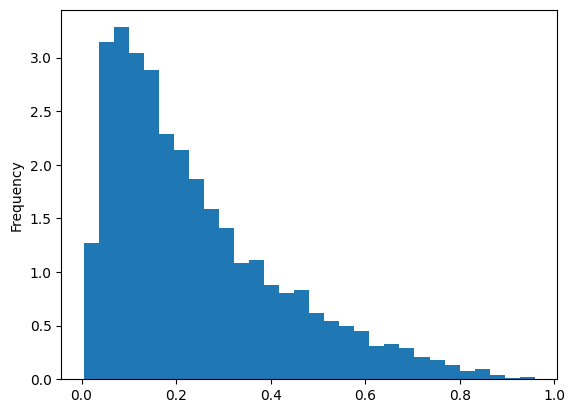

In [8]:
# Histogram of df['churn_risk_score']with density
df['churn_risk_score'].plot.hist(density=True, bins=30)

### Efectos esperados

In [9]:
# ATU y ATT esperados
df.groupby('treatment')['churn_risk_score'].mean() * df.groupby('treatment')['effect'].mean()

treatment
0    0.066404
1    0.078527
dtype: float64

In [10]:
# ATE esperado
df['churn_risk_score'].mean() * -df['effect'].mean()

-0.07048367274487817

In [11]:
df[['churn_prob', 'churn_risk_score', 'treatment', 'effect', 'churned']]

,churn_prob,churn_risk_score,treatment,effect,churned
0,0.109862,0.109862,0,0.3,0
1,0.110648,0.158069,1,0.3,0
2,0.036888,0.052697,1,0.3,0
3,0.071723,0.071723,0,0.3,0
4,0.045413,0.064875,1,0.3,0
...,...,...,...,...,...
9995,0.133023,0.190032,1,0.3,0
9996,0.606405,0.606405,0,0.2,0
9997,0.122756,0.175365,1,0.3,0
9998,0.578835,0.578835,0,0.2,0


In [12]:
# Count how many received treatment and how many did not
df['treatment'].value_counts()

treatment
0    6685
1    3315
Name: count, dtype: int64